In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataX = np.array([[1, 1], [1, 4], [4, 5], [5, 1], [1, 4], [4, 1]])
dataY = np.array([4, 5, 1, 4, 1, 1])

In [26]:
labelShape = 6
trainX = []
for line in dataX:
    trainX.append([tf.one_hot(x, depth = labelShape) for x in line])
trainX = np.reshape(trainX, (len(trainX), 2, labelShape))
trainY = dataY

In [27]:
#[ 送入样本数, 循环核时间展开步数, 时间步输入特征数 ]
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, return_sequences=True),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(labelShape, activation='softmax')
])

采用了双层LSTM
其实本案例使用单层RNN就可以了

In [28]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = 'adam',
    metrics = ['sparse_categorical_accuracy']
)

In [29]:
histroy = model.fit(
    trainX,
    trainY,
    epochs = 100)
model.summary()

Epoch 1/100


1/1 [==============================] - 3s 3s/step - loss: 1.7896 - sparse_categorical_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 1.7869 - sparse_categorical_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7842 - sparse_categorical_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 1.7816 - sparse_categorical_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.7789 - sparse_categorical_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 1.7762 - sparse_categorical_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.7735 - sparse_categorical_accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 1.7708 - sparse_categorical_accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7681 - s

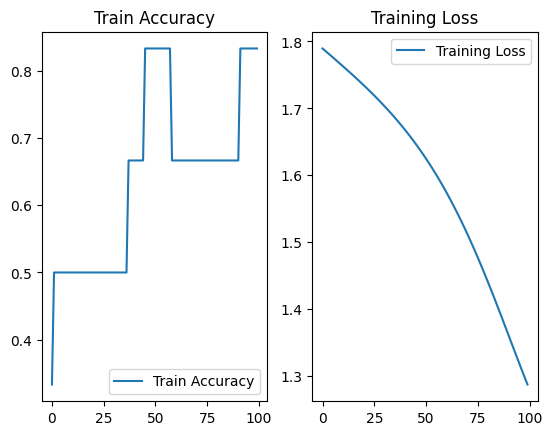

In [30]:
acc = histroy.history['sparse_categorical_accuracy']
loss = histroy.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.title('Train Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()

In [33]:
for line in trainX:
    # print(np.array([line]).sha]
    # pe)
    predictY = model.predict(np.array([line]))
    res = int(tf.argmax(predictY, axis=1))
    print(res)
# predictY = model.predict(np.array([tf.one_hot([1, 4], depth = labelShape)]))
# res = int(tf.argmax(predictY, axis = 1))

res

1/1 [==============================] - 0s 27ms/step
4
1/1 [==============================] - 0s 30ms/step
1
1/1 [==============================] - 0s 27ms/step
1
1/1 [==============================] - 0s 15ms/step
4
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 15ms/step
1


1